In [2]:
%matplotlib inline


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Анализ данных учебного конкурса на  Kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs).

In [ ]:
df = pd.read_csv('/content/howpop_train.csv')

In [ ]:
df.shape

(134137, 17)

In [ ]:
df.head().T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


In [ ]:
list(df.columns.values)

['url',
 'domain',
 'post_id',
 'published',
 'author',
 'flow',
 'polling',
 'content_len',
 'title',
 'comments',
 'favs',
 'views',
 'votes_plus',
 'votes_minus',
 'views_lognorm',
 'favs_lognorm',
 'comments_lognorm']

Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [ ]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [ ]:
df.describe(include = ['object', 'bool']).T # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://geektimes.ru/company/medgadgets/blog/2...,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [ ]:
# настройка внешнего вида графиков в seaborn

sns.set_style('dark')
sns.set_palette('RdBu')
sns.set_context('notebook', font_scale = 1.5, 
                rc = {'figure.figsize' : (15, 5), 'axes.titlesize' : 18})

Столбец `published` (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [ ]:
print(df.published.dtype)

df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [ ]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

----------
В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос.

## 1\. В каком месяце (и какого года) было больше всего публикаций?

In [ ]:
df1 = df.groupby(['year', 'month'])['published'].count() # группируем публикации по годам и месяцам, считаем количество
df2 = df1.sort_values(ascending=False)[:4] # сортируем по убыванию и выводим первые 4 значения
df2

year  month
2015  3        2189
2016  3        2115
2015  7        2111
      4        2110
Name: published, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

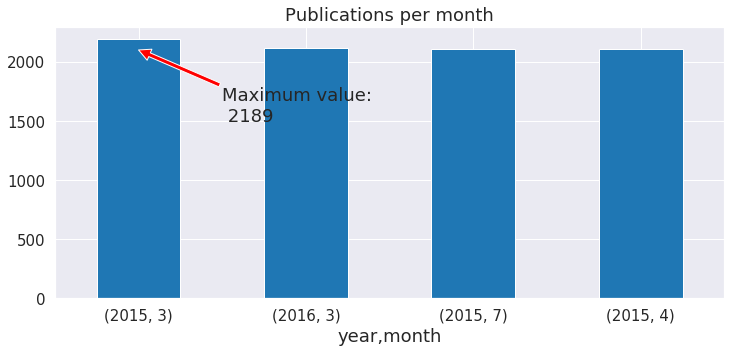

In [ ]:
df2.plot(kind='bar', figsize=(12, 5), fontsize=15, colormap='tab10', title='Publications per month') # строим график
plt.grid()
plt.annotate('Maximum value: \n 2189', xytext=(0.5, 1500), xy=(0,2100), arrowprops={'facecolor':'red'}) # отмечаем максимум
plt.xticks(rotation=0)

**Больше всего публикаций было в марте 2015-го года**

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабре публикуют примерно одинаковое число статей

In [ ]:
# Один или несколько дней сильно выделяются из общей картины

df1 = df.groupby(['dayofweek'])['published'].count() # группируем публикации по дням недели, считаем количество
df1

dayofweek
1    23636
2    24575
3    23660
4    23082
5    21292
6     8380
7     9512
Name: published, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

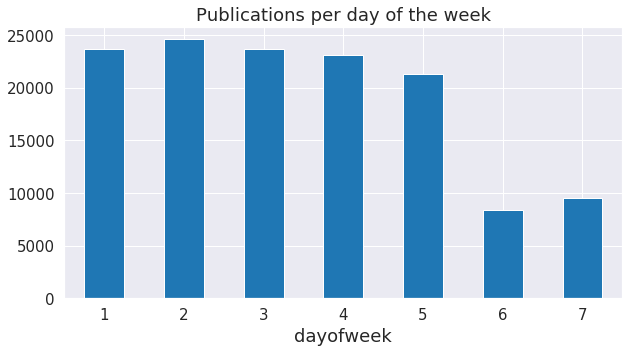

In [ ]:
df1.plot(kind='bar', figsize=(10, 5), fontsize=15, colormap='tab10', title='Publications per day of the week')
plt.grid()
plt.xticks(rotation=0)

**Да, в субботу и воскресенье публикуется меньше всего статей.**

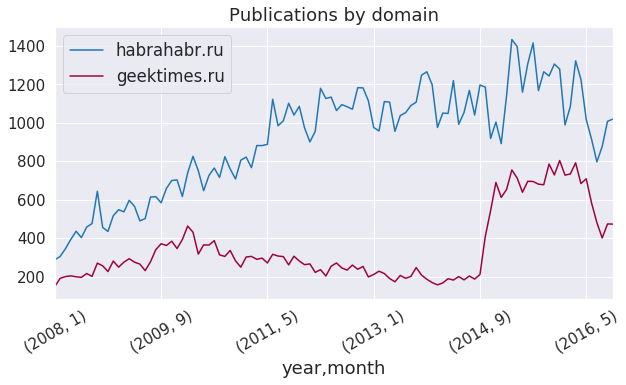

In [ ]:
# На хабре всегда больше статей, чем на гиктаймсе

hb = df[(df['domain'] == 'habrahabr.ru')] # создаем отдельные таблицы с данными для habrahabr.ru и geektimes.ru
gk = df[(df['domain'] == 'geektimes.ru')]

hb.groupby(['year', 'month'])['domain'].count().plot(figsize=(10, 5), fontsize=15, colormap='tab10') # группируем по месяцам и выводим график
gk.groupby(['year', 'month'])['domain'].count().plot(figsize=(10, 5), fontsize=15, colormap='Spectral')

plt.title('Publications by domain')
plt.grid()
plt.xticks(rotation=30)
plt.legend(('habrahabr.ru', 'geektimes.ru'))

**Да, на хабре всегда больше статей, чем на гиктаймсе.**

domain
geektimes.ru    2665
habrahabr.ru    5715
Name: published, dtype: int64

domain
geektimes.ru    0.318019
habrahabr.ru    0.681981
Name: published, dtype: float64



(array([0, 1]), <a list of 2 Text xticklabel objects>)

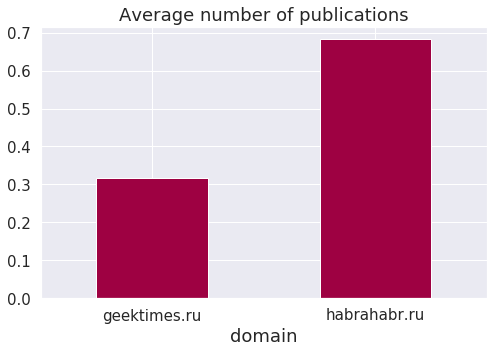

In [ ]:
# По субботам на гиктаймс и на хабре публикуют примерно одинаковое число статей

df_sat = df[  df['dayofweek'] == 6] # создаем таблицу с данными для субботы
total_value = df_sat.groupby(['domain'])['published'].count() # группируем данные по домену и считаем количество публикаций
print(total_value)
print()
average_value = df_sat.groupby(['domain'])['published'].count() / len(df_sat) # посчитаем среднее число публикаций в субботу по доменам
print(average_value)
print()

average_value.plot(kind='bar', figsize=(8, 5), fontsize=15, colormap='Spectral') # выведем график для среднего числа публикаций
plt.title('Average number of publications')
plt.grid()
plt.xticks(rotation=0)

**По субботам на habrahabr.ru публикуют примерно в 2 раза больше статей, чем на geektimes.ru.**

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

hour
12    177152709
Name: views, dtype: int64



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

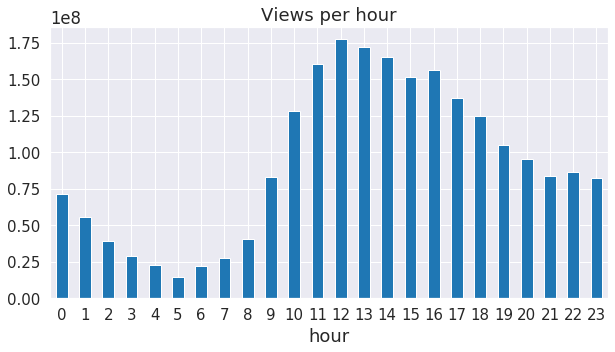

In [ ]:
# Больше всего просмотров набирают статьи, опубликованные в 12 часов дня

df_hour = df.groupby(['hour'])['views'].sum().sort_values(ascending=False)[:1] # выведем время с наибольшими просмотрами
print(df_hour)
print()
df.groupby(['hour'])['views'].sum().plot(kind='bar', figsize=(10, 5), fontsize=15, colormap='tab10', title='Views per hour') # построим график просмотров по часам
plt.grid()
plt.xticks(rotation=0)

**Да, статьи, опубликованные в 12 часов дня, набирают больше всего просмотров, это хорошее время для публикации.**

hour
13    389168
Name: comments, dtype: int64



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

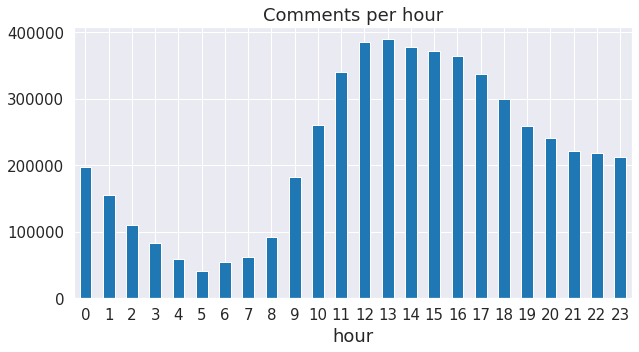

In [ ]:
# У опубликованных в 10 утра постов больше всего комментариев

print(df.groupby(['hour'])['comments'].sum().sort_values(ascending=False)[:1])
print()
df.groupby(['hour'])['comments'].sum().plot(kind='bar', figsize=(10, 5), fontsize=15, colormap='tab10', title='Comments per hour')
plt.grid()
plt.xticks(rotation=0)

**Нет, больше всего комментариев у статей, опубликованных в 13 часов.**

hour
12    177152709
Name: views, dtype: int64



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

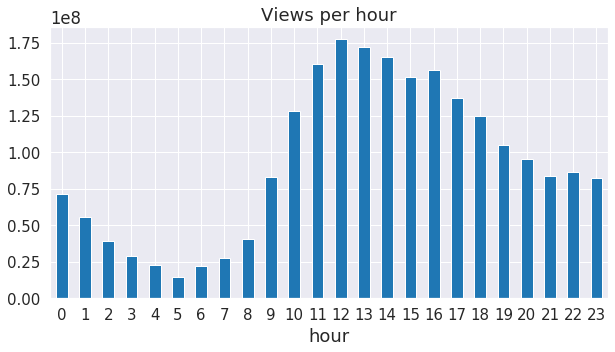

In [ ]:
# Больше всего просмотров набирают статьи, опубликованные в 6 часов утра

print(df.groupby(['hour'])['views'].sum().sort_values(ascending=False)[:1])
print()
df.groupby(['hour'])['views'].sum().plot(kind='bar', figsize=(10, 5), fontsize=15, colormap='tab10', title='Views per hour')
plt.grid()
plt.xticks(rotation=0)

**Нет, статьи, опубликованные в 6 часов утра, набирают очень мало просмотров, в это время статьи лучше не публиковать.**

        hour  comments
38763      2      2266
65285     20      1887
38742     17      1829
126328    21      1578
127407    12      1214
128795     1      1118
128880    16      1039
132667    22       997
13811     16       990
131997    12       962



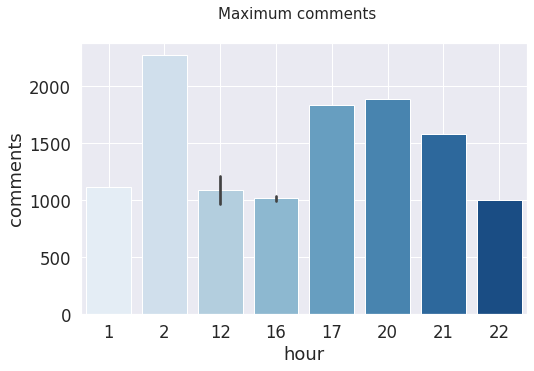

In [ ]:
# Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера

gk = df[ (df['domain'] == 'geektimes.ru')].sort_values(['comments'], ascending=False)[:10] # сортируем по количеству комментариев и выводим первые 10 результатов
print(gk[['hour', 'comments']])
print()
plt.figure(figsize=(8, 5))
sns.barplot(x=gk['hour'], y=gk['comments'], palette='Blues')
plt.suptitle('Maximum comments', fontsize=15)
plt.grid()

**Нет, максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 2 часа утра.**


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

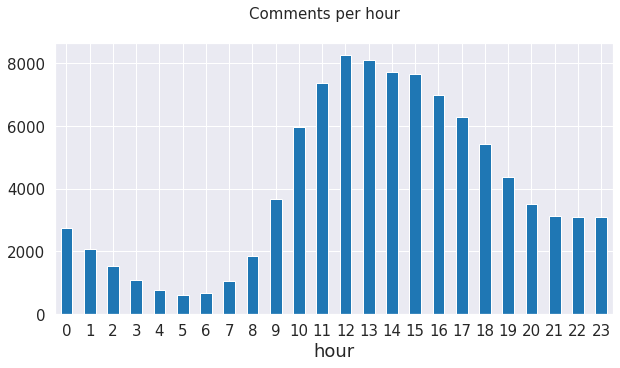

In [ ]:
# На хабре дневные статьи комментируют чаще, чем вечерние

hb = df[ (df['domain'] == 'habrahabr.ru')]

hb.groupby(['hour'])['comments'].count().plot(kind='bar', figsize=(10, 5), fontsize=15, colormap='tab10') # группируем по часам и выводим график
plt.suptitle('Comments per hour', fontsize=15)
plt.grid()
plt.xticks(rotation=0)

**Да, на хабре дневные статьи комментируют чаще, чем вечерние.**

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

author
@Mithgol     11367.0
@Mordatyj     4057.0
@alizar      41734.0
@ilya42       3183.0
Name: votes_minus, dtype: float64



(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

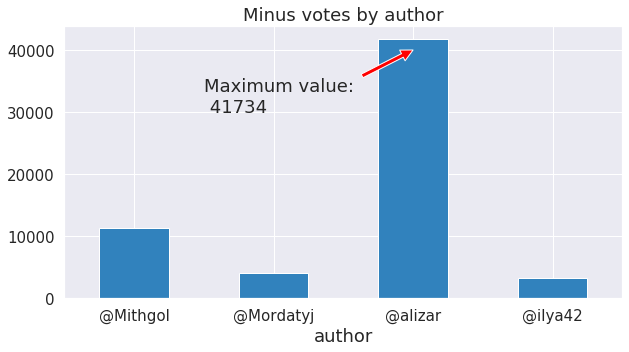

In [ ]:
df_2 = df[(df['author'] == '@Mordatyj') | (df['author'] == '@Mithgol') \
          | (df['author'] == '@alizar') | (df['author'] == '@ilya42')] # выделяем таблицу с нужными авторами
print(df_2.groupby(['author'])['votes_minus'].sum()) # выводим сгруппированные данные для минусов
print()
df_2.groupby(['author'])['votes_minus'].sum().plot(kind='bar', figsize=(10, 5), fontsize=15, colormap='tab20c', title='Minus votes by author')
plt.grid()
plt.annotate('Maximum value: \n 41734', xytext=(0.5, 30000), xy=(2,40000), arrowprops={'facecolor':'red'})
plt.xticks(rotation=0)

**Чаще всего минусуют автора @alizar.**

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

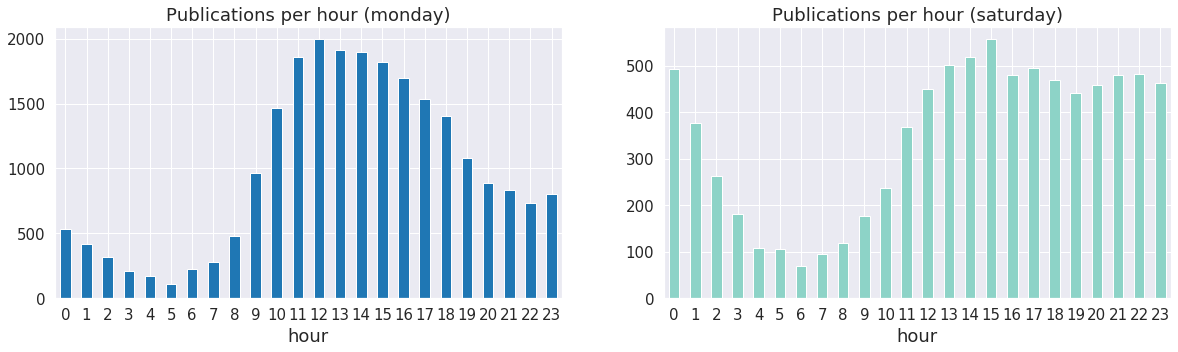

In [ ]:
mon = df[ (df['dayofweek'] == 1)] # выделяем таблицы для понедельника и субботы
sat = df[ (df['dayofweek'] == 6)]

plt.subplot (1, 2, 1) # настраиваем сетку для двух графиков
p_max_mon = mon.groupby(['hour'])['published'].count()
p_max_mon.plot(kind='bar', figsize=(20, 5), fontsize=15, colormap='tab10', title='Publications per hour (monday)')
plt.grid()
plt.xticks(rotation=0)

plt.subplot (1, 2, 2)
p_max_sat = sat.groupby(['hour'])['published'].count()
p_max_sat.plot(kind='bar', figsize=(20, 5), fontsize=15, colormap='Set3', title='Publications per hour (saturday)')
plt.grid()
plt.xticks(rotation=0)

**Нет, по субботам пишут равномерно в течение дня (не считая ночных и утренних часов), по понедельникам пишут в основном днем).**